In [17]:
import gym
import matplotlib
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

# link to problem description  
https://www.gymlibrary.dev/environments/box2d/lunar_lander/#description  
The state is an 8-dimensional vector:   
the coordinates of the lander in x & y  
its linear velocities in x & y    
its angle  
its angular velocity   
and two booleans  
that represent whether each leg is in contact with the ground or not.  


# Action Space
There are four discrete actions available:  
do nothing,  
fire left orientation engine  
fire main engine  
fire right orientation engine  

In [18]:
render_mode= 'human'
# render_mode = 'rgb_array'

In [19]:
env = gym.make("LunarLander-v2",render_mode=render_mode)

In [20]:
tmp_ = []

In [21]:
actions = {
    'donothing':0,
    'goleft':1,
    'main':2,
    'goright':3
}

In [22]:
angles_= []
steps_= []

In [23]:
episodes = 10
for episode in range(1,episodes+1):
    state = env.reset()[0]
    done = False
    score = 0
    step_ = 0
    while not done:
        tmp_.append(env.render())
        angle = state[4]
        angles_.append(angle)
        steps_.append(step_)
        action = None
        eps_ = 0.01 
        if angle>eps_:
            action = actions['goright']
        elif angle<eps_:
            action = actions['goleft']
        else:
            action = action['donothing']
        state, reward, done,trunceted, info = env.step(action)
        score+=reward
        step_ +=1
env.close()


Text(0.5, 0, 'шаг симуляции')

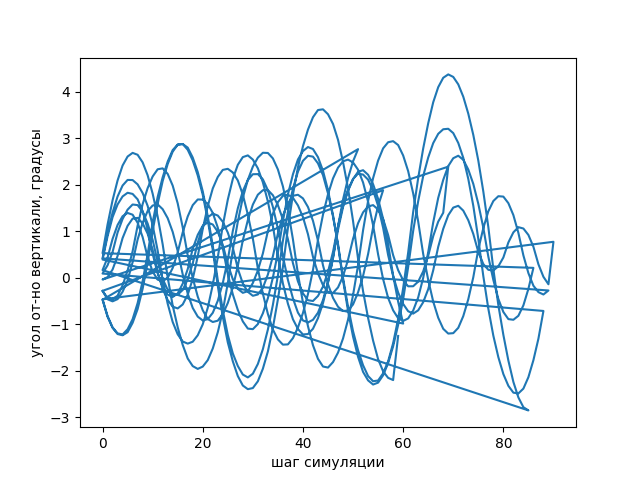

In [24]:
fig,ax = plt.subplots()
ax.plot(steps_,np.asarray(angles_)*180.0/np.pi)
ax.set_ylabel('угол от-но вертикали, градусы')
ax.set_xlabel('шаг симуляции')
